## 6.01 - Supervised Learning Model Comparison

Recall the "data science process."

1. Define the problem.
2. Gather the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [1]:
import pandas as pd
df=pd.read_csv('../6_01-lab-supervised-learning-models/401ksubs.csv')
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275 entries, 0 to 9274
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   e401k   9275 non-null   int64  
 1   inc     9275 non-null   float64
 2   marr    9275 non-null   int64  
 3   male    9275 non-null   int64  
 4   age     9275 non-null   int64  
 5   fsize   9275 non-null   int64  
 6   nettfa  9275 non-null   float64
 7   p401k   9275 non-null   int64  
 8   pira    9275 non-null   int64  
 9   incsq   9275 non-null   float64
 10  agesq   9275 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 797.2 KB


##### 2. What are 2-3 other variables that, if available, would be helpful to have?

1. Number of dependants - More dependants, likely to have less funds for investments
2. Occupations or Industry of work - If they are working in customer service sector versus Finance, unlikely to be interested in investment
3. Highest level of education - the more educated, the higher the likelihood to know and understand about investment

##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

It might be discriminating to certain race as it might suggest that only a certain race is/are interested in to invest in IRAs and 401k.

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

Family size and marital status, as it is to have a lower correlation with income.

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

incsq and agesq. SMEs might have done it because they expected income and age to have a non-linear relationship. 

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

INC looks like it is in per $1000

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

- LogisticRegression
- KNN
- Decision Tree
- Random Forest
- Bagging
- AdaBoost
- SVC

##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector regressor
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
import matplotlib.pyplot as plt

In [4]:
X = df.drop('inc', axis=1)
y=df['inc']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


In [5]:
# Scaling
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.fit_transform(X_test)

In [6]:
models = {"LinearRegression": LinearRegression(),
          "KNN": KNeighborsRegressor(),
          "Decision Tree": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(),
          "Bagging": BaggingRegressor(),
          "AdaBoost": AdaBoostRegressor(),
          "SVR": SVR(),
          "XGBoost": xgb.XGBRegressor()
         }

In [7]:
results = []
for model in models.values():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

In [8]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"{name} Train Set Accuracy: {train_score} \n{name} Test Set Accuracy: {test_score} \n ")


LinearRegression Train Set Accuracy: 0.9042657299473781 
LinearRegression Test Set Accuracy: 0.9103274918573819 
 
KNN Train Set Accuracy: 0.9596754578810568 
KNN Test Set Accuracy: 0.9369819355182614 
 
Decision Tree Train Set Accuracy: 1.0 
Decision Tree Test Set Accuracy: 0.9980229278705459 
 
Random Forest Train Set Accuracy: 0.999989832777585 
Random Forest Test Set Accuracy: 0.9980696616884012 
 
Bagging Train Set Accuracy: 0.9999728432298366 
Bagging Test Set Accuracy: 0.9979743116818105 
 
AdaBoost Train Set Accuracy: 0.9920645524395331 
AdaBoost Test Set Accuracy: 0.9928682109605583 
 
SVR Train Set Accuracy: 0.878930227408786 
SVR Test Set Accuracy: 0.8575650813565883 
 
XGBoost Train Set Accuracy: 0.9999918822087891 
XGBoost Test Set Accuracy: 0.9980641301734868 
 


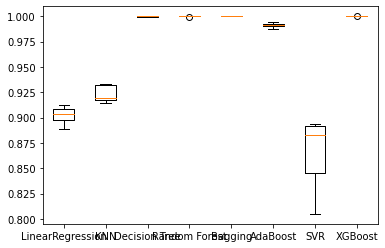

In [9]:
plt.boxplot(results, labels=models.keys())
plt.show()

##### 9. What is bootstrapping?

Bootstrapping is a resampling technique that involves repeatedly drawing samples from our source data with replacement, often to estimate a population parameter.

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

A decision tree categorize or make predictions based on how a previous set of questions were answered.<br>
Bagging is an ensemble algorithm that fits multiple models on different subsets of a training dataset, then combines the predictions from all models.

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

Bagging is an ensemble algorithm that fits multiple models on different subsets of a training dataset, then combines the predictions from all models.<br>
Random forest is an extension of bagging that also randomly selects subsets of features used in each data sample.

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

Bagging reduces variance whereas boosting reduces bias

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

In [10]:
from sklearn.metrics import mean_squared_error as mse

for name, model in models.items():
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    rmse_train = mse(y_train, y_pred_train, squared=False)
    rmse_test = mse(y_test, y_pred_test, squared=False)
    print(f"{name} Training RMSE: {rmse_train} \n{name} Testing RMSE: {rmse_test} \n ")

LinearRegression Training RMSE: 7.417805263260388 
LinearRegression Testing RMSE: 7.349160927058248 
 
KNN Training RMSE: 4.81422556749834 
KNN Testing RMSE: 6.1608499133841335 
 
Decision Tree Training RMSE: 6.022860099808153e-16 
Decision Tree Testing RMSE: 1.0912376854990709 
 
Random Forest Training RMSE: 0.07644390686945807 
Random Forest Testing RMSE: 1.0782632756638775 
 
Bagging Training RMSE: 0.12493403626090883 
Bagging Testing RMSE: 1.1045729679596406 
 
AdaBoost Training RMSE: 2.1356369471729457 
AdaBoost Testing RMSE: 2.0725611012414524 
 
SVR Training RMSE: 8.341796212933463 
SVR Testing RMSE: 9.262246496856916 
 
XGBoost Training RMSE: 0.06830628269742853 
XGBoost Testing RMSE: 1.0798070886311009 
 


In [11]:
list(zip(df.columns, models['AdaBoost'].feature_importances_))

[('e401k', 0.0),
 ('inc', 0.0),
 ('marr', 0.0),
 ('male', 0.0),
 ('age', 0.0),
 ('fsize', 0.0),
 ('nettfa', 0.0),
 ('p401k', 0.0),
 ('pira', 1.0000000000000004),
 ('incsq', 0.0)]

##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

KNN, Decision Tree, Random Forest, Bagging, SVR

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

AdaBoost, very slight overfitting which can be ignored but higher accuracy compared to linear regression

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

Tune max_depth, min_samples_split and min_samples_leaf

## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

p401k likely to be highly correlated with e401k, as if one is already participating in 401k, he/she is eligible for 401k.<br>
Hence, it is not a very useful variable

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

- LogisticRegression
- KNN
- Decision Tree
- Random Forest
- Bagging
- AdaBoost
- SVC

##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector classifier
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [12]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC

In [13]:
X = df.drop('e401k', axis=1)
y=df['e401k']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [14]:
# Scaling
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.fit_transform(X_test)

In [15]:
models = {"LogisticRegression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Bagging": BaggingClassifier(),
          "AdaBoost": AdaBoostClassifier(),
          "SVC": SVC(),
          "XGBoost": xgb.XGBClassifier()
         }

In [16]:
results = []
for model in models.values():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

In [17]:
results

[array([0.89218329, 0.88005391, 0.89285714, 0.87735849, 0.87668464]),
 array([0.87398922, 0.85444744, 0.87398922, 0.85714286, 0.85983827]),
 array([0.80256065, 0.79514825, 0.81266846, 0.80660377, 0.80458221]),
 array([0.88477089, 0.87264151, 0.89016173, 0.87533693, 0.86792453]),
 array([0.87601078, 0.86455526, 0.87938005, 0.86792453, 0.86522911]),
 array([0.89218329, 0.88005391, 0.89285714, 0.87601078, 0.87668464]),
 array([0.89150943, 0.87735849, 0.89150943, 0.87601078, 0.87601078]),
 array([0.88140162, 0.86590296, 0.88342318, 0.86725067, 0.86455526])]

In [18]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"{name} Train Set Accuracy: {train_score} \n{name} Test Set Accuracy: {test_score} \n ")

LogisticRegression Train Set Accuracy: 0.8838274932614555 
LogisticRegression Test Set Accuracy: 0.8851752021563343 
 
KNN Train Set Accuracy: 0.8943396226415095 
KNN Test Set Accuracy: 0.8609164420485175 
 
Decision Tree Train Set Accuracy: 1.0 
Decision Tree Test Set Accuracy: 0.7800539083557951 
 
Random Forest Train Set Accuracy: 1.0 
Random Forest Test Set Accuracy: 0.8787061994609164 
 
Bagging Train Set Accuracy: 0.9827493261455525 
Bagging Test Set Accuracy: 0.8652291105121294 
 
AdaBoost Train Set Accuracy: 0.8846361185983828 
AdaBoost Test Set Accuracy: 0.8846361185983828 
 
SVC Train Set Accuracy: 0.8842318059299191 
SVC Test Set Accuracy: 0.8857142857142857 
 
XGBoost Train Set Accuracy: 0.9311320754716981 
XGBoost Test Set Accuracy: 0.8754716981132076 
 


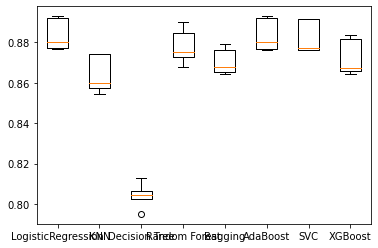

In [19]:
plt.boxplot(results, labels=models.keys())
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error as mse

for name, model in models.items():
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    rmse_train = mse(y_train, y_pred_train, squared=False)
    rmse_test = mse(y_test, y_pred_test, squared=False)
    print(f"{name} y_pred_train: {y_pred_train.mean()}\n\
    {name} y_pred_test RMSE: {y_pred_test.mean()}\n\
    {name} Training RMSE: {rmse_train}\n\
    {name}Testing RMSE: {rmse_test}\n")

LogisticRegression y_pred_train: 0.2765498652291105
    LogisticRegression y_pred_test RMSE: 0.2749326145552561
    LogisticRegression Training RMSE: 0.34084088184744576
    LogisticRegressionTesting RMSE: 0.3388580792067171

KNN y_pred_train: 0.30835579514824796
    KNN y_pred_test RMSE: 0.31212938005390833
    KNN Training RMSE: 0.3250544221488004
    KNNTesting RMSE: 0.3729390807511094

Decision Tree y_pred_train: 0.39272237196765497
    Decision Tree y_pred_test RMSE: 0.42749326145552563
    Decision Tree Training RMSE: 0.0
    Decision TreeTesting RMSE: 0.46898410596117734

Random Forest y_pred_train: 0.39272237196765497
    Random Forest y_pred_test RMSE: 0.28679245283018867
    Random Forest Training RMSE: 0.0
    Random ForestTesting RMSE: 0.34827259515942904

Bagging y_pred_train: 0.3757412398921833
    Bagging y_pred_test RMSE: 0.30566037735849055
    Bagging Training RMSE: 0.13134182066062372
    BaggingTesting RMSE: 0.36711154910717614

AdaBoost y_pred_train: 0.277358490566

## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

false positives: someone we predicted as eligible but is in fact not eligible<br>
false negatives: someone we predicted as not eligible but is in fact eligible

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

minimize false positives, so that we do not waste resources targeting at the wrong audience.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

Increase precision and specificity 

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

F1 score is a harmonic mean of precision and recall.

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

In [21]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score

In [22]:
for name, model in models.items():
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    print(f"{name} y_pred_train: {y_pred_train.mean()}\n\
    {name} f1_score: {f1_score(y_train, y_pred_train)}\n\
    {name} y_pred_test: {y_pred_test.mean()}\n\
    {name} f1_score: {f1_score(y_test, y_pred_test)}\n")

LogisticRegression y_pred_train: 0.2765498652291105
    LogisticRegression f1_score: 0.8264196536447845
    LogisticRegression y_pred_test: 0.2749326145552561
    LogisticRegression f1_score: 0.8272506082725061

KNN y_pred_train: 0.30835579514824796
    KNN f1_score: 0.8492887351018839
    KNN y_pred_test: 0.31212938005390833
    KNN f1_score: 0.8018433179723502

Decision Tree y_pred_train: 0.39272237196765497
    Decision Tree f1_score: 1.0
    Decision Tree y_pred_test: 0.42749326145552563
    Decision Tree f1_score: 0.7308707124010554

Random Forest y_pred_train: 0.39272237196765497
    Random Forest f1_score: 1.0
    Random Forest y_pred_test: 0.28679245283018867
    Random Forest f1_score: 0.8207171314741036

Bagging y_pred_train: 0.3757412398921833
    Bagging f1_score: 0.9775517362329007
    Bagging y_pred_test: 0.30566037735849055
    Bagging f1_score: 0.8062015503875968

AdaBoost y_pred_train: 0.27735849056603773
    AdaBoost f1_score: 0.827835880933226
    AdaBoost y_pred_tes

In [23]:
y_pred_AdaBoost = models['AdaBoost'].predict(X_test_scaled)

In [24]:
# Generate confusion matrix
confusion_matrix(y_test, 
                 y_pred_AdaBoost)

array([[1131,    1],
       [ 213,  510]], dtype=int64)

C:\Users\ng_li\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


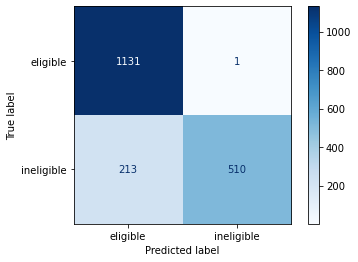

In [25]:
plot_confusion_matrix(models['AdaBoost'], X_test_scaled, y_test, cmap='Blues', 
                      values_format='d', display_labels=['eligible', 'ineligible']);

In [26]:
f1_score(y_test, y_pred_AdaBoost)

0.8265802269043759

##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

KNN, DecisionTree, RandomForest, Bagging, AdBoost, XGBoost

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

AdBoost and SVC produce very similar accuracy score and overfitting trade-off.<br>
Given that SVC has slower processing when the data is huge, I would choose ADboost over SVC.

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

Tune n_estimators and learning_rate

## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

- Regression: What features best predict one's income?<br>
family size